In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset

df = pd.read_csv(r"C:\Users\Pc\Downloads\my project\airline_passenger_satisfaction_50000.csv")

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,80638,98687,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
1,43398,80734,Male,Loyal Customer,22,Business travel,Business,393,3,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
2,32751,5711,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
3,33571,23035,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
4,71287,53962,Male,disloyal Customer,35,Business travel,Business,1117,2,2,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,91068,32439,Male,Loyal Customer,31,Business travel,Business,3326,0,4,...,1,1,4,5,3,2,1,0,0.0,satisfied
49996,2293,75001,Male,disloyal Customer,25,Business travel,Business,236,5,0,...,1,4,5,5,5,5,1,3,0.0,satisfied
49997,71917,101446,Male,Loyal Customer,42,Business travel,Business,3287,1,1,...,4,4,5,4,5,4,4,0,0.0,satisfied
49998,4191,115746,Male,Loyal Customer,36,Business travel,Business,2346,3,4,...,3,3,3,3,2,3,1,12,25.0,neutral or dissatisfied


In [ ]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    28162
satisfied                  21838
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         50000 non-null  int64  
 1   id                                 50000 non-null  int64  
 2   Gender                             50000 non-null  object 
 3   Customer Type                      50000 non-null  object 
 4   Age                                50000 non-null  int64  
 5   Type of Travel                     50000 non-null  object 
 6   Class                              50000 non-null  object 
 7   Flight Distance                    50000 non-null  int64  
 8   Inflight wifi service              50000 non-null  int64  
 9   Departure/Arrival time convenient  50000 non-null  int64  
 10  Ease of Online booking             50000 non-null  int64  
 11  Gate location                      50000 non-null  int

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,80638,98687,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
1,43398,80734,Male,Loyal Customer,22,Business travel,Business,393,3,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
2,32751,5711,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
3,33571,23035,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
4,71287,53962,Male,disloyal Customer,35,Business travel,Business,1117,2,2,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied


In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49855.000000
mean,51999.691820,64798.447560,39.42320,1189.082100,2.738620,3.063280,2.763920,2.980120,3.205680,3.255920,3.44394,3.363320,3.382060,3.34996,3.631340,3.306640,3.638180,3.289760,14.777420,15.190212
std,29898.404711,37465.525368,15.11559,996.068365,1.331111,1.523247,1.403676,1.282107,1.331034,1.349304,1.31773,1.333489,1.287324,1.31385,1.178464,1.261937,1.177461,1.313969,38.136851,38.669234
min,1.000000,5.000000,7.00000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26367.750000,32439.750000,27.00000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51913.000000,64666.500000,40.00000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77778.750000,97174.500000,51.00000,1739.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.00000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,1017.000000,1011.000000


In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             145
satisfaction    

In [ ]:
df.shape

(50000, 25)

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             145
satisfaction    

In [ ]:
df_cleaned = df.dropna()


In [ ]:
df_cleaned.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df_cleaned.shape

(49855, 25)

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

In [ ]:
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]
print("Missing Values in Each Column:\n", missing_df)

Missing Values in Each Column:
                           Missing Values  Percentage
Arrival Delay in Minutes             145        0.29


In [ ]:
threshold = 30

In [ ]:
cols_to_drop = missing_df[missing_df['Percentage'] > threshold].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns (>{threshold}% missing data): {cols_to_drop}")


Dropped columns (>30% missing data): []


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,80638,98687,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
1,43398,80734,Male,Loyal Customer,22,Business travel,Business,393,3,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
2,32751,5711,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
3,33571,23035,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
4,71287,53962,Male,disloyal Customer,35,Business travel,Business,1117,2,2,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         50000 non-null  int64  
 1   id                                 50000 non-null  int64  
 2   Gender                             50000 non-null  object 
 3   Customer Type                      50000 non-null  object 
 4   Age                                50000 non-null  int64  
 5   Type of Travel                     50000 non-null  object 
 6   Class                              50000 non-null  object 
 7   Flight Distance                    50000 non-null  int64  
 8   Inflight wifi service              50000 non-null  int64  
 9   Departure/Arrival time convenient  50000 non-null  int64  
 10  Ease of Online booking             50000 non-null  int64  
 11  Gate location                      50000 non-null  int

In [ ]:
df.shape

(50000, 25)

In [ ]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [ ]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,80638,98687,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
1,43398,80734,Male,Loyal Customer,22,Business travel,Business,393,3,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
2,32751,5711,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
3,33571,23035,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
4,71287,53962,Male,disloyal Customer,35,Business travel,Business,1117,2,2,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied


In [ ]:
duplicates = df.duplicated().sum()

In [ ]:
if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicate rows dropped.")

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\3789217346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette='coolwarm')


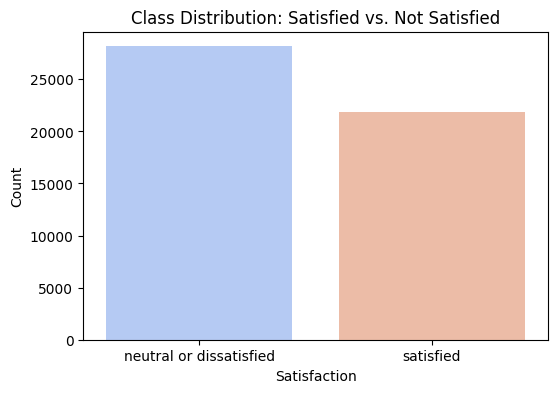

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', data=df, palette='coolwarm')
plt.title('Class Distribution: Satisfied vs. Not Satisfied')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2190199004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


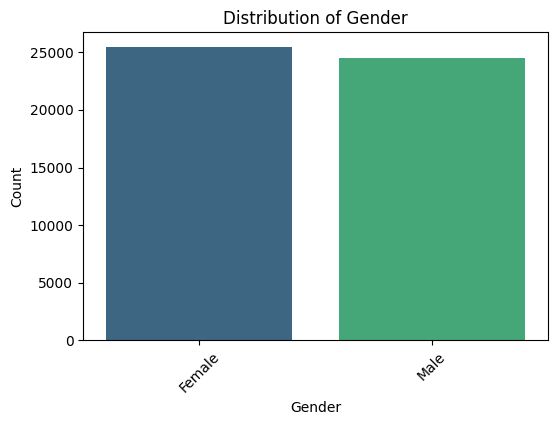

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2190199004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


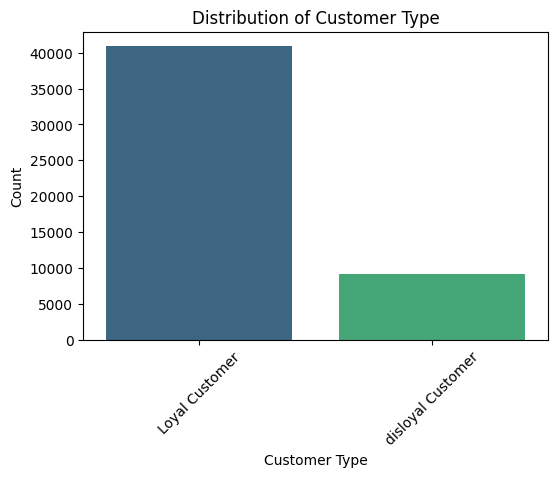

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2190199004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


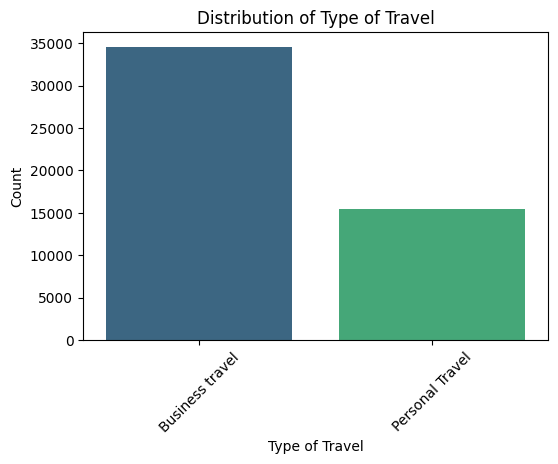

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2190199004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


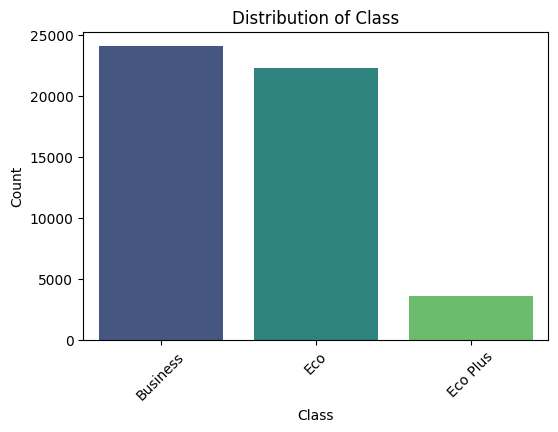

In [ ]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


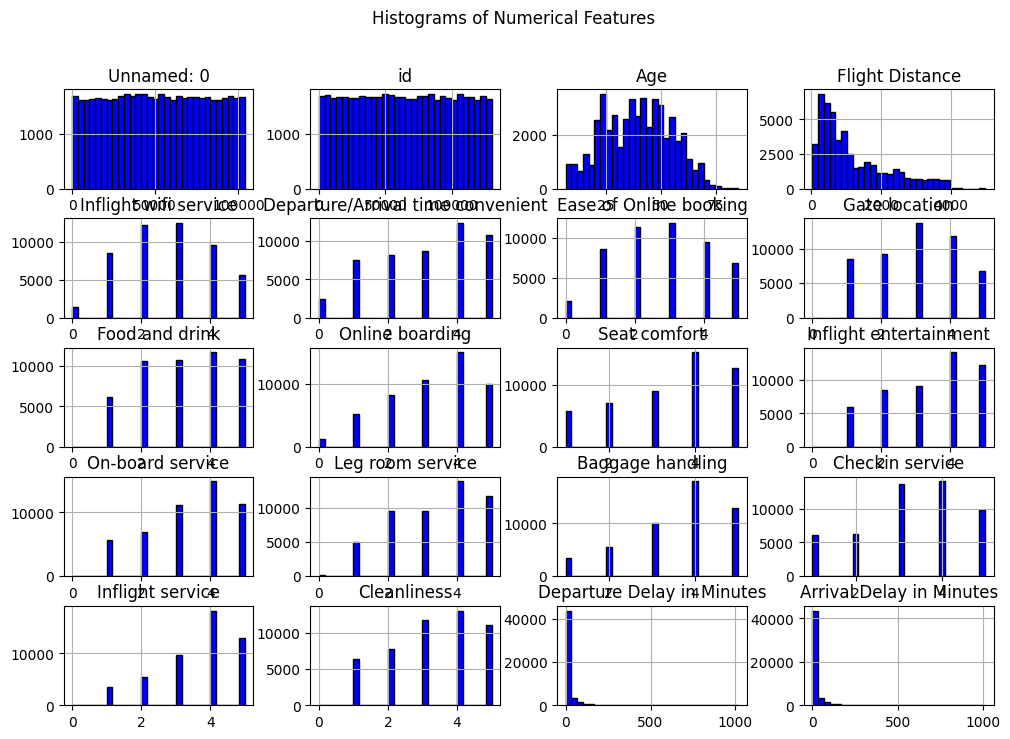

In [ ]:
df.hist(figsize=(12, 8), bins=30, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

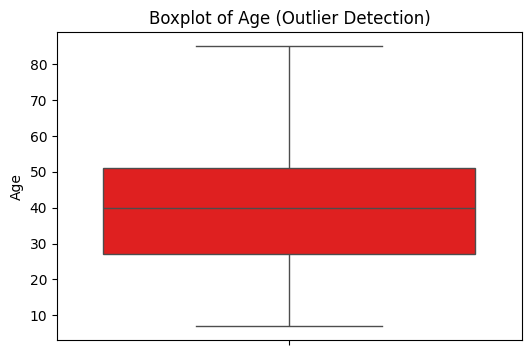

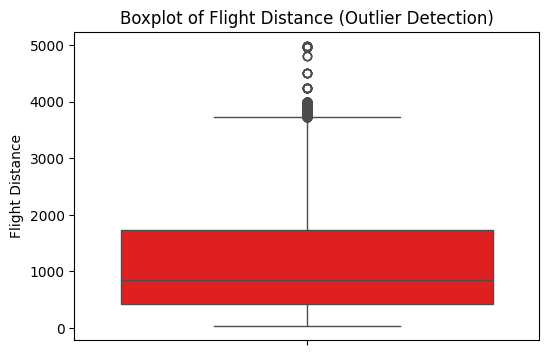

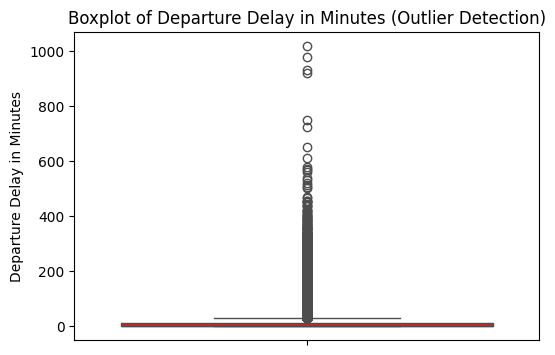

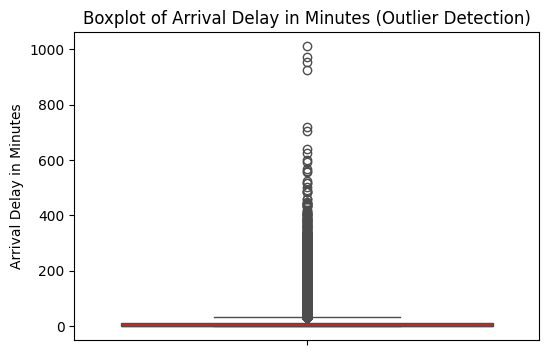

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='red')
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.show()

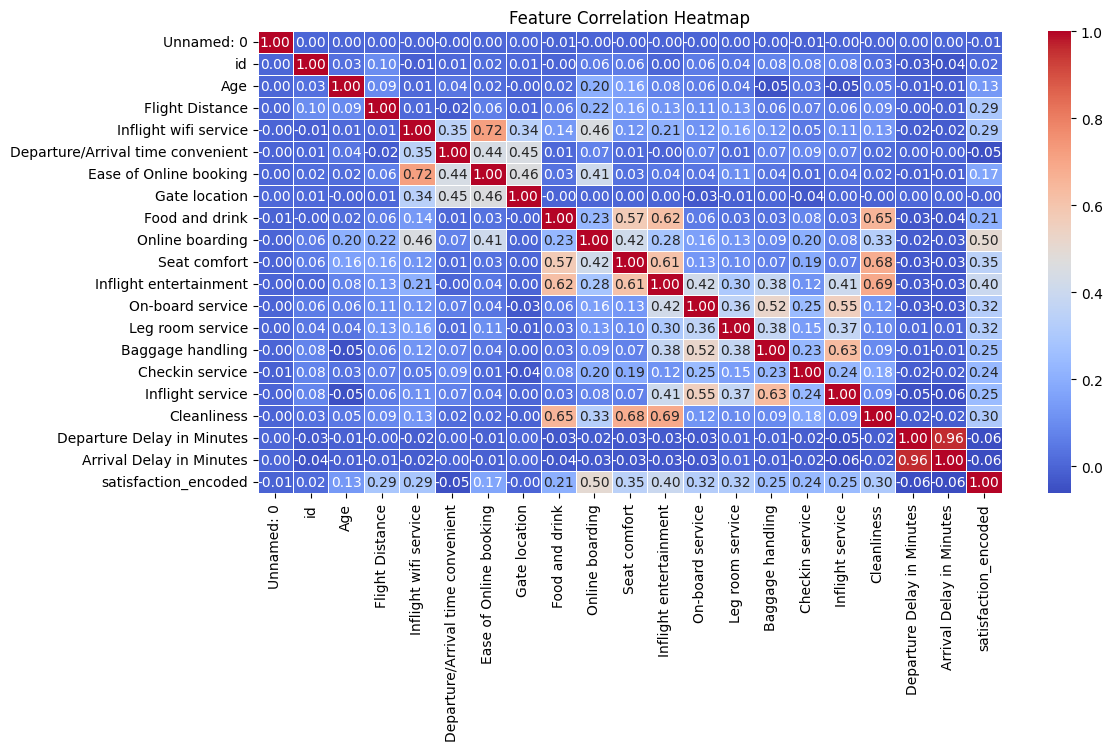

In [ ]:
plt.figure(figsize=(12, 6))
# Convert 'satisfaction' column to numerical using LabelEncoder if it's not already numerical
if df['satisfaction'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['satisfaction_encoded'] = label_encoder.fit_transform(df['satisfaction'])
    sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
else:
    sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

   Unnamed: 0     id  Gender      Customer Type       Age   Type of Travel  \
0       80638  98687  Female     Loyal Customer -0.888046  Personal Travel   
1       43398  80734    Male     Loyal Customer -1.152676  Business travel   
2       32751   5711  Female     Loyal Customer  1.295153  Personal Travel   
3       33571  23035  Female     Loyal Customer -0.491101  Personal Travel   
4       71287  53962    Male  disloyal Customer -0.292628  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco        -0.329380                      2   
1  Business        -0.799232                      3   
2       Eco        -0.997012                      1   
3       Eco        -0.169751                      2   
4  Business        -0.072367                      2   

   Departure/Arrival time convenient  ...  On-board service  Leg room service  \
0                                  4  ...                 5                 4   
1                                  5  

In [ ]:
from sklearn.model_selection import train_test_split

target_variable = "satisfaction"
X = df.drop(columns=[target_variable])
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (40000, 25), (40000,)
Testing set: (10000, 25), (10000,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming categorical_cols is defined as in your code
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Keep numerical columns as is
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # Apply OneHotEncoder to categorical columns
    ])

# Apply the preprocessing to your training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Initialize and train the Random Forest model with the encoded data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7651

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.79      0.79      0.79      5632
              satisfied       0.73      0.73      0.73      4368

               accuracy                           0.77     10000
              macro avg       0.76      0.76      0.76     10000
           weighted avg       0.77      0.77      0.77     10000



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Model Evaluation Metrics:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Evaluation Metrics:

Accuracy: 0.7651
Precision: 0.7651
Recall: 0.7651
F1-score: 0.7651

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.79      0.79      0.79      5632
              satisfied       0.73      0.73      0.73      4368

               accuracy                           0.77     10000
              macro avg       0.76      0.76      0.76     10000
           weighted avg       0.77      0.77      0.77     10000



C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\1106329199.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


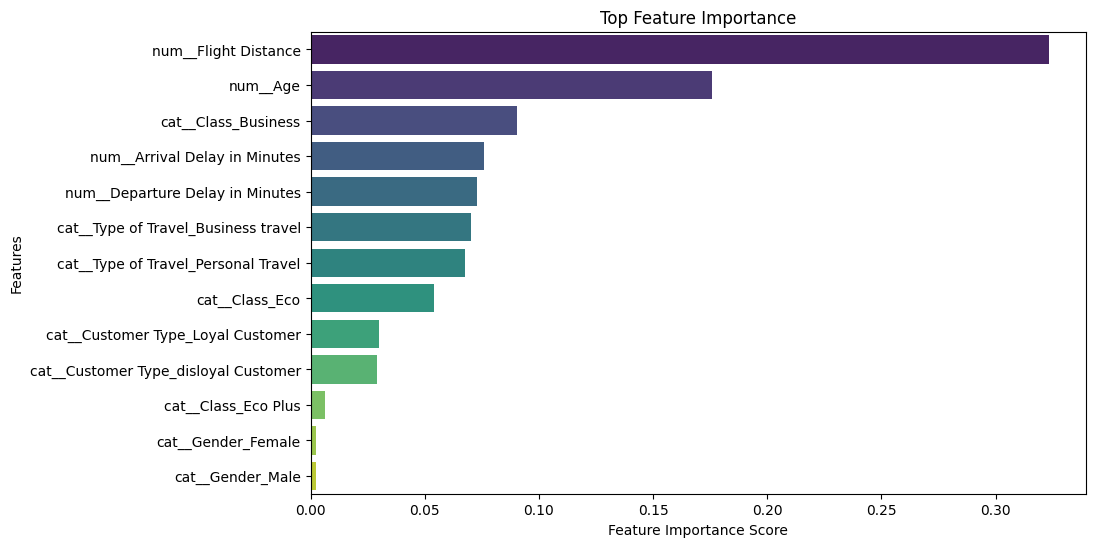

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


feature_importance = model.feature_importances_


feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Feature Importance")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Train accuracy
# Use the preprocessed training data for prediction
train_predictions = model.predict(X_train_encoded)
train_accuracy = accuracy_score(y_train, train_predictions)

# Test accuracy
# Use the preprocessed testing data for prediction
test_predictions = model.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, test_predictions)

# Display results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9967
Test Accuracy: 0.7651


C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'satisfied'], label="Satisfied", shade=True, color="green")
C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'neutral or dissatisfied'], label="Not Satisfied", shade=True, color="red")


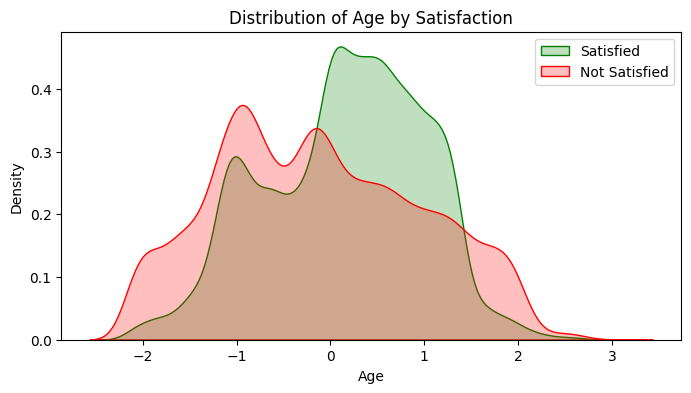

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'satisfied'], label="Satisfied", shade=True, color="green")
C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'neutral or dissatisfied'], label="Not Satisfied", shade=True, color="red")


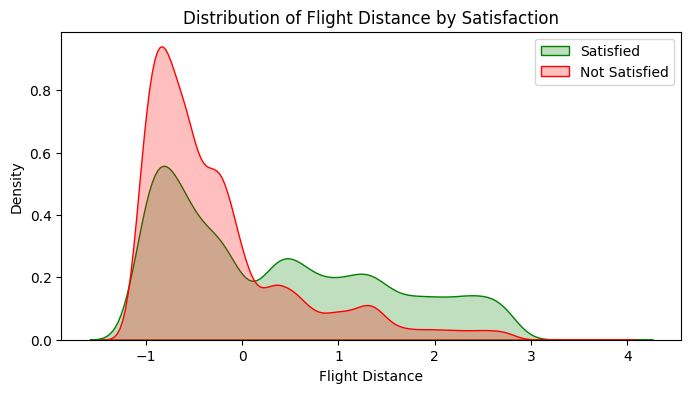

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'satisfied'], label="Satisfied", shade=True, color="green")
C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'neutral or dissatisfied'], label="Not Satisfied", shade=True, color="red")


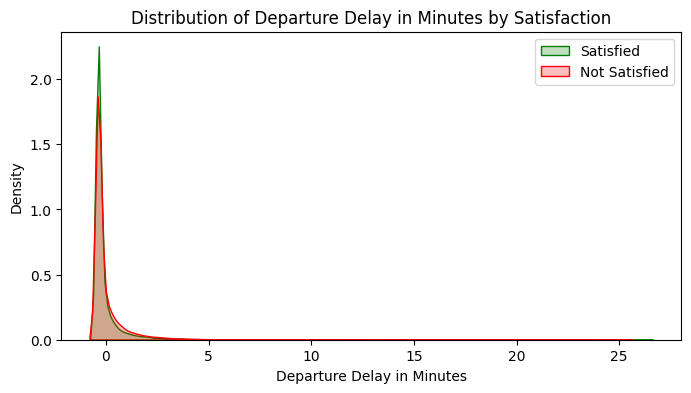

C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'satisfied'], label="Satisfied", shade=True, color="green")
C:\Users\Pc\AppData\Local\Temp\ipykernel_5532\2996708409.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['satisfaction'] == 'neutral or dissatisfied'], label="Not Satisfied", shade=True, color="red")


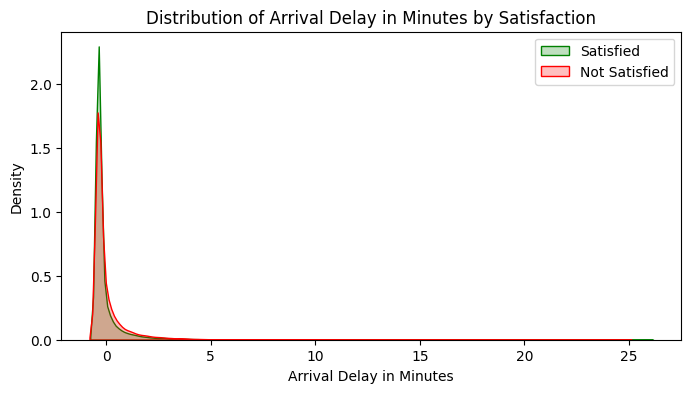

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col][df['satisfaction'] == 'satisfied'], label="Satisfied", shade=True, color="green")
    sns.kdeplot(df[col][df['satisfaction'] == 'neutral or dissatisfied'], label="Not Satisfied", shade=True, color="red")
    plt.title(f'Distribution of {col} by Satisfaction')
    plt.legend()
    plt.show()

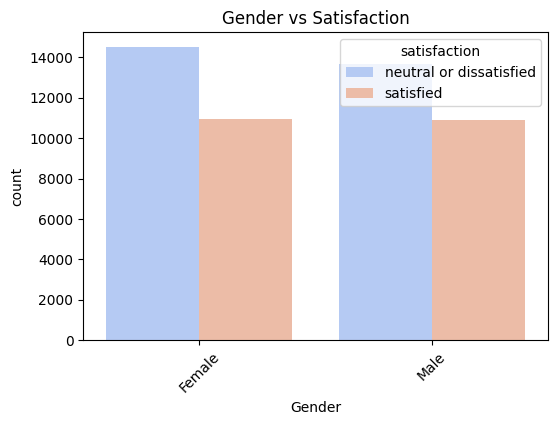

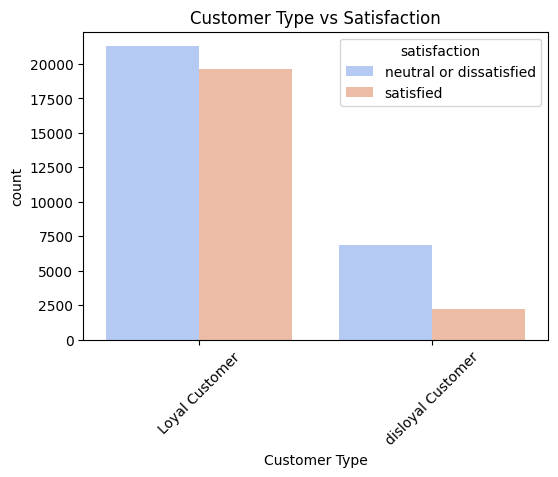

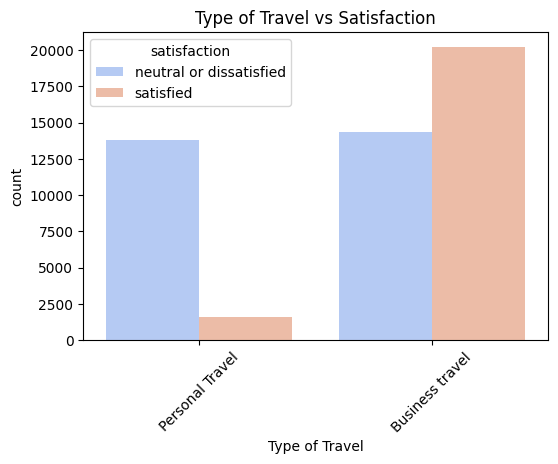

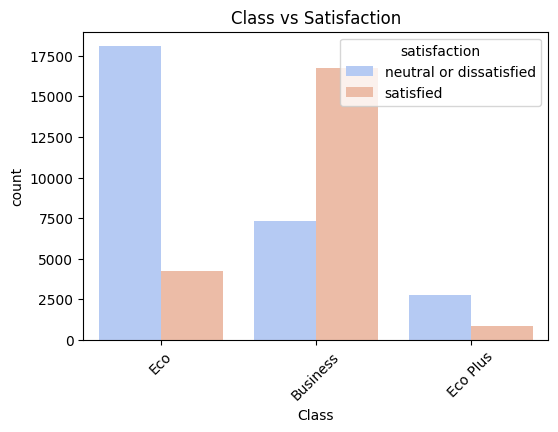

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='satisfaction', data=df, palette='coolwarm')
    plt.title(f'{col} vs Satisfaction')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
print("\n✅ Final Dataset Shape After EDA:", df.shape)
print("\n✅ EDA Completed Successfully!")


✅ Final Dataset Shape After EDA: (50000, 26)

✅ EDA Completed Successfully!


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # More regularized Random Forest
# rf = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=10,                      # limit the depth of the trees
#     min_samples_split=10,             # minimum number of samples to split a node
#     min_samples_leaf=4,               # minimum number of samples in a leaf node
#     max_features='sqrt',              # limit features considered at each split
#     class_weight='balanced',          # handle class imbalance
#     random_state=42
# )


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, classification_report


pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
        ])),
    ('classifier', rf)
])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
        ])),
    ('classifier', best_rf)
])


In [ ]:
# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Detailed performance
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8124
Test Accuracy: 0.7995

Classification Report (Test):
                         precision    recall  f1-score   support

neutral or dissatisfied       0.84      0.79      0.82      5632
              satisfied       0.75      0.81      0.78      4368

               accuracy                           0.80     10000
              macro avg       0.80      0.80      0.80     10000
           weighted avg       0.80      0.80      0.80     10000



In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'classifier__max_depth': [6, 10, 15],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4],
# }

# grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro')
# grid.fit(X_train, y_train)

# print("Best params:", grid.best_params_)
# print("Best F1 score:", grid.best_score_)


In [ ]:
# # Assuming you have already preprocessed your data as X_train_encoded, X_test_encoded
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Define the pipeline
# pipeline = Pipeline([
#     ('preprocessor', ColumnTransformer(
#         transformers=[
#             ('num', 'passthrough', ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']),
#             ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
#         ])),
#     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42 ,class_weight='balanced'))
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)

# # Make predictions on the training set
# y_train_pred = pipeline.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print(f"Training Accuracy: {train_accuracy:.4f}")

# # Make predictions on the test set
# y_test_pred = pipeline.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy:.4f}")

# # Detailed classification report
# print("\nClassification Report on Test Set:")
# print(classification_report(y_test, y_test_pred))

In [ ]:
import pickle

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)